Last edit: June 29th, 2018

# Calculation of trap frequency

<div style="text-align: right;">
<font size="4">Editor: Ryuta Yamamoto</font>
</div>

### Load python modules for calculation of trap frequency

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Mathmatics calculation
#from sympy import *
from sympy import pi, I
from sympy import Symbol, symbols
from sympy import sqrt, sin, cos, exp
from sympy import Matrix, transpose
from sympy import solve, simplify, diff, series, Poly
from sympy import lambdify
from sympy.plotting import plot, plot3d
from sympy import init_printing

init_printing()

### Default plot settings
see: https://matplotlib.org/users/customizing.html

In [2]:
plt.rcParams["font.size"] = 14
plt.rcParams['xtick.direction'] = 'in' # direction: in, out, or inout
plt.rcParams['ytick.direction'] = 'in' # direction: in, out, or inout
plt.rcParams['axes.linewidth'] = 1.5 # edge linewidth
plt.rcParams['xtick.major.size'] = 8 # major tick size in points
plt.rcParams['xtick.major.width'] = 1.5 # major tick width in points
plt.rcParams['xtick.top'] = True # draw ticks on the top side
plt.rcParams['ytick.major.size'] = 8 # major tick size in points
plt.rcParams['ytick.major.width'] = 1.5 # major tick width in points
plt.rcParams['ytick.right'] = True # draw ticks on the right side

### Functions
Norm_vector(v): $\left|\boldsymbol{v} \right|^2$

Cross_vector(v1, v2): $\boldsymbol{v}_1 \times \boldsymbol{v}_2$

In [3]:
def Norm_vector(v):
    return sqrt((transpose(v) * v)[0])

def Cross_vector(v1, v2):
    return Matrix([v1[1]*v2[2]-v1[2]*v2[1], v1[2]*v2[0]-v1[0]*v2[2], v1[0]*v2[1]-v1[1]*v2[0]])

### Symbols for sympy calculation

In [4]:
x, y, z = symbols('x y z', real=True)

# Cartesian coordinates
r = Matrix([x, y, z])

# Light of speed
c = Symbol('c', positive=True)

# mass of rubidium atom
mass = Symbol('m_{\mathrm{Rb}}', positive=True)

# Wavenumber
k = Symbol("k", positive=True)

# Acceleration of gravity
g = Symbol("g", positive=True)

### Polarizability
Optical dipole potential $U({\boldsymbol r})$ is written by
\begin{equation}
U({\boldsymbol r}) = -\dfrac{\pi c^2}{2}
\left(\mathcal{D}_1 + 2\mathcal{D}_2 - g_F m_F \mathcal{P}(\boldsymbol r)
\left[\mathcal{D}_1 - \mathcal{D}_2 \right] \right) I({\boldsymbol r})
\equiv -\dfrac{\alpha}{4} I({\boldsymbol r}),
\end{equation}
where
\begin{eqnarray}
  \mathcal{D}_i &=& \dfrac{\varGamma_{\mathrm{D}_i}}{\omega_{\mathrm{D}_i}^3}
  \left(\dfrac{1}{\omega_{\mathrm{D}_i} - \omega_{\mathrm{L}}}
    + \dfrac{1}{\omega_{\mathrm{D}_i} + \omega_{\mathrm{L}}} \right),\\
  \mathcal{P}(\boldsymbol r) &\equiv&
    \dfrac{I_{\sigma^+}(\boldsymbol r) - I_{\sigma^-}(\boldsymbol r)}{I(\boldsymbol r)}.
\end{eqnarray}

Then polarizability $\alpha$ defined here is writtne by
\begin{equation}
\alpha = -4 \sum_i\dfrac{\pi c^2 \varGamma_{i}}{2 {\omega_i}^3}
\dfrac{1 - \mathcal{P}g_F m_F}{\varDelta_i}.
\end{equation}
Here we use the rotating wave approximation for above calculation.

[1] [PhD thesis, M. Weinberg (2014)](http://photon.physnet.uni-hamburg.de/fileadmin/user_upload/ILP/Sengstock/Research/SpinorBEC/Theses/WeinbergPhD.pdf)


In [5]:
GammaD = symbols(r'\varGamma_{D_1} \varGamma_{D_2}', real=True)
omegaD = symbols(r'\omega_{D_1} \omega_{D_2}', real=True)
wavelengthD = symbols(r'\lambda_{D_1} \lambda_{D_2}', real=True)
omegaL = Symbol(r'\omega_{L}', real=True)

D = [GammaD[n] / omegaD[n]**3 * (1 / (omegaD[n] - omegaL) + 1 / (omegaD[n] + omegaL)) for n in range(2)]

alpha = - pi * c**2 / 2 * (D[0] + 2 * D[1]) * 4

alpha

        ⎛                  ⎛            1                           1         
        ⎜2⋅\varGamma_{D_2}⋅⎜───────────────────────── + ──────────────────────
      2 ⎜                  ⎝\omega_{D_2} + \omega_{L}   \omega_{D_2} - \omega_
-2⋅π⋅c ⋅⎜─────────────────────────────────────────────────────────────────────
        ⎜                                          3                          
        ⎝                              \omega_{D_2}                           

   ⎞                   ⎛            1                           1            ⎞
───⎟   \varGamma_{D_1}⋅⎜───────────────────────── + ─────────────────────────⎟
{L}⎠                   ⎝\omega_{D_1} + \omega_{L}   \omega_{D_1} - \omega_{L}⎠
──── + ───────────────────────────────────────────────────────────────────────
                                                3                             
                                    \omega_{D_1}                              

⎞
⎟
⎟
⎟
⎟
⎠

### Constants

#### [Fundamental physical constants (2006 CODATA)](https://physics.nist.gov/cuu/Constants/RevModPhys_80_000633acc.pdf)

In [6]:
c_val = 2.99792458 * 1e8 # Speed of Light (m/s)
mu_0_val = 2 * np.pi * 1e-7 # Permeability of Vacuum (N/A^2)
epsilon_0_val = 1 / (mu_0_val * c_val**2) # Permittivity of Vacuum (F/m)
h_val = 6.62606896 * 1e-34 # Planck constant (J/Hz)
hbar_val = 6.62606896 * 1e-34 / (2 * np.pi) # Dirac constant (J/Hz)
e_val = 1.602176487 * 1e-19 # Elementary Charge (C)
mu_B_val = 9.27400915 * 1e-24 # Bohr Magneton (J/G)
mass_u_val = 1.660538782 * 1e-27 # Atomic Mass Unit (kg)
mass_e_val = 9.10938215 * 1e-31 # Electron Mass (kg)
a0_val = 0.52917720859 * 1e-10 # Bohr Radius (m)
kB_val = 1.3806504 * 1e-23 # Boltzmann constant (J/K)
g_val = 9.80665 # Acceleration of gravity (m/s^2) #### 9.797957 ####
#g_val = 0.001 # Acceleration of gravity (m/s^2)


#### Atomic property
Reference.)

[Daniel Steck, "Rubidium 87 D Line Data"](http://steck.us/alkalidata/rubidium87numbers.pdf)

[Daniel Steck, "Rubidium 85 D Line Data"](https://steck.us/alkalidata/rubidium85numbers.pdf)

In [7]:
__atom = 'Rubiduim-87'
#__atom = 'Rubiduim-85'

if __atom == 'Rubiduim-87':
    mass_Rb_val = mass_u_val * 86.909180520
    GammaD_val = [2 * np.pi * 5.7500 * 1e6, 2 * np.pi * 6.0666 * 1e6] # Natural Line Widths [D1, D2] (Hz)
    wavelengthD_val = [794.978851156 * 1e-9, 780.241209686 * 1e-9] # Wavelengths (vacuum) [D1, D2] (Hz)
else:
    mass_Rb_val = mass_u_val * 84.911789732
    GammaD_val = [2 * np.pi * 5.7500 * 1e6, 2 * np.pi * 6.0666 * 1e6] # Natural Line Widths [D1, D2] (Hz)
    wavelengthD_val = [794.767282 * 1e-9, 780.241368271 * 1e-9] # Wavelengths (vacuum) [D1, D2] (Hz)

mass_Rb_val
GammaD_val

#### Laser parameters

In [8]:
# FORTs
lambdaFORT_val = 1064e-9
P01_val = 24.7e-3
w01_val = 39.4e-6
P02_val = 40.0e-3
w02_val = 40.8e-6
elip_val = 1

#P01_val = 109.1e-3
#P02_val = 40.6e-3

alpha0_calc = alpha.subs({GammaD[0]: GammaD_val[0], GammaD[1]: GammaD_val[1],
                          omegaD[0]: 2 * pi * c / wavelengthD[0], omegaD[1]: 2 * pi * c / wavelengthD[1]
                         })
alpha0_calc = alpha0_calc.subs({wavelengthD[0]: wavelengthD_val[0],
                                wavelengthD[1]: wavelengthD_val[1],
                                omegaL: 2 * pi * c / lambdaFORT_val})
alpha0_calc = (alpha0_calc.subs(c, c_val)).evalf()

# Triangular optical lattice
lambdaH_val = 1064e-9
P0H_val = 1.5
P0H_val = 1.800/2590 * 30
w0H_val = 120e-6
elipH_val = 1/3
thetaH_val = 2 / 3 * np.pi

alphaH_calc = alpha.subs({GammaD[0]: GammaD_val[0], GammaD[1]: GammaD_val[1],
                          omegaD[0]: 2 * pi * c / wavelengthD[0], omegaD[1]: 2 * pi * c / wavelengthD[1]
                         })
alphaH_calc = alphaH_calc.subs({wavelengthD[0]: wavelengthD_val[0],
                                wavelengthD[1]: wavelengthD_val[1],
                                omegaL: 2 * pi * c / lambdaH_val})
alphaH_calc = (alphaH_calc.subs(c, c_val)).evalf()

# Vertical lattice
lambdaV_val = 810e-9
P0V_val = 25e-3
w0V_val = 120e-6
elipV_val = 1/3
thetaV_val = 20 * np.pi / 180
kV_val = 2 * np.pi / lambdaV_val

alphaV_calc = alpha.subs({GammaD[0]: GammaD_val[0], GammaD[1]: GammaD_val[1],
                          omegaD[0]: 2 * pi * c / wavelengthD[0], omegaD[1]: 2 * pi * c / wavelengthD[1]
                         })
alphaV_calc = alphaV_calc.subs({wavelengthD[0]: wavelengthD_val[0],
                                wavelengthD[1]: wavelengthD_val[1],
                                omegaL: 2 * pi * c / lambdaV_val})
alphaV_calc = (alphaV_calc.subs(c, c_val)).evalf()


### Optical trap

#### Parameters

Wavenumbers of horizontal lattice $\boldsymbol{k}_i$ are defined by
\begin{eqnarray*}
\boldsymbol{k}_1
= k \times \left( \sin\theta_1\cos\phi_1 \hat{e}_x + \sin\theta_1\sin\phi_1 \hat{e}_y + \cos\theta_1 \hat{e}_z \right),\\
\boldsymbol{k}_2
= k \times \left( \sin\theta_2\cos\phi_2 \hat{e}_x + \sin\theta_2\sin\phi_2 \hat{e}_y + \cos\theta_2 \hat{e}_z \right),\\
\end{eqnarray*}
where wavenumber $k = 2\pi / \lambda$, and $\theta_i$ and $\phi_i$ is ...

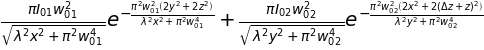

In [9]:
theta1, theta2 = symbols(r'\theta_1 \theta_2', real=True)
phi1, phi2 = symbols(r'\phi_1 \phi_2', real=True)
dz = Symbol(r'\Delta z', real=True)

k = Symbol("k", positive=True) # beam radius of horizontal lattice beam
lambdaFORT = Symbol(r"\lambda", positive=True) # beam radius of horizontal lattice beam
w01, w02 = symbols("w_{01}, w_{02}", positive=True) # beam radius of vertical lattice beam
P01, P02 = symbols(r'P_{01}, P_{02}', positive=True) # Laser power of horizontal and vertical lattice
I01, I02 = symbols(r'I_{01}, I_{02}', positive=True) # Laser power of horizontal and vertical lattice

alpha0 = Symbol(r'\alpha_0', real=True)

k1 = transpose(k * Matrix([[sin(theta1) * cos(phi1), sin(theta1) * sin(phi1), cos(theta1)]]))
k2 = transpose(k * Matrix([[sin(theta2) * cos(phi2), sin(theta2) * sin(phi2), cos(theta2)]]))

# FORT 1
z_tmp = simplify((transpose(k1) * r) / k)[0]
r_tmp = Norm_vector(Cross_vector(k1, r) / k)
zR = pi * w01**2 / lambdaFORT
w = w01 * sqrt(1 + (z_tmp/zR)**2)
E1 = sqrt(I01) * exp(-I* k * z_tmp - r_tmp**2/w**2) * sqrt(w01 / w)

I1 = simplify(E1 * E1.conjugate()).subs({theta1: pi/2, phi1: 0})

# FORT 2
z_tmp = simplify((transpose(k2) * r) / k)[0]
r_tmp = Norm_vector(Cross_vector(k2, r) / k)

zR = pi * w02**2 / lambdaFORT
w = w02 * sqrt(1 + (z_tmp/zR)**2)
E2 = sqrt(I02) * exp(-I* k * z_tmp - r_tmp**2/w**2) * sqrt(w02 / w)

I2 = simplify(E2 * E2.conjugate()).subs({theta2: pi/2, phi2: pi/2, z: z+dz})

I1 + I2

#### Potential $U$

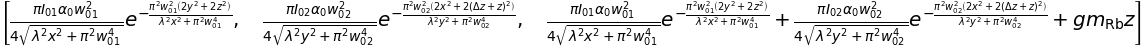

In [10]:
U01 = alpha0 * I1 / 4
U02 = alpha0 * I2 / 4

U0 = U01 + U02 + mass * g * z
[U01, U02, U0]

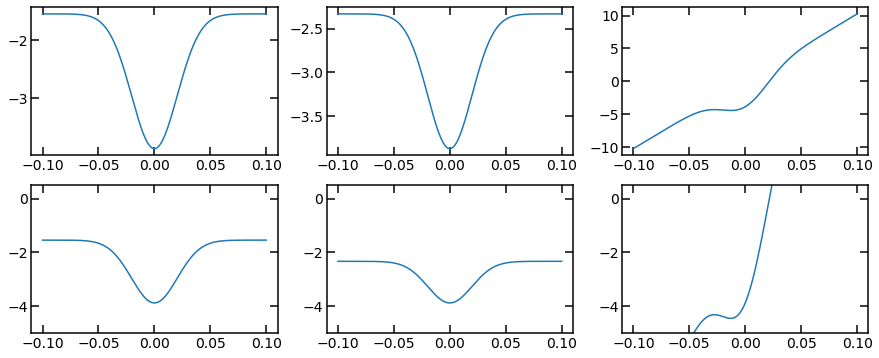

In [11]:
dz_val = -0.5e-6

x_vals = np.linspace(-100e-6, 100e-6, 2001)
y_vals = np.linspace(-100e-6, 100e-6, 2001)
z_vals = np.linspace(-100e-6, 100e-6, 2001)

U0_x_est = lambdify(x, (U0.subs({alpha0: alpha0_calc, lambdaFORT: lambdaFORT_val,
                                 I01: 2 * P01_val / (np.pi * w01_val**2), w01: w01_val, P01: P01_val,
                                 I02: 2 * P02_val / (np.pi * w02_val**2), w02: w02_val, P02: P02_val,
                                 mass: mass_Rb_val, g: g_val,
                                 y: 0, z: 0, dz: dz_val})).evalf(),
                    "numpy")
U0_y_est = lambdify(y, (U0.subs({alpha0: alpha0_calc, lambdaFORT: lambdaFORT_val,
                                 I01: 2 * P01_val / (np.pi * w01_val**2), w01: w01_val, P01: P01_val,
                                 I02: 2 * P02_val / (np.pi * w02_val**2), w02: w02_val, P02: P02_val,
                                 mass: mass_Rb_val, g: g_val,
                                 x: 0, z: 0, dz: dz_val})).evalf(),
                    "numpy")
U0_z_est = lambdify(z, (U0.subs({alpha0: alpha0_calc, lambdaFORT: lambdaFORT_val,
                                 I01: 2 * P01_val / (np.pi * w01_val**2), w01: w01_val, P01: P01_val,
                                 I02: 2 * P02_val / (np.pi * w02_val**2), w02: w02_val, P02: P02_val,
                                 mass: mass_Rb_val, g: g_val,
                                 x: 0, y: 0, dz: dz_val})).evalf(),
                    "numpy")
U0_x_vals = U0_x_est(x_vals) / kB_val * 1e6
U0_y_vals = U0_y_est(y_vals) / kB_val * 1e6
U0_z_vals = U0_z_est(z_vals) / kB_val * 1e6

plt.figure(figsize=([15, 6]))

plt.subplot(2, 3, 1)
plt.plot(x_vals * 1e3, U0_x_vals)
plt.subplot(2, 3, 2)
plt.plot(y_vals * 1e3, U0_y_vals)
plt.subplot(2, 3, 3)
plt.plot(z_vals * 1e3, U0_z_vals)

plt.subplot(2, 3, 4)
plt.plot(x_vals * 1e3, U0_x_vals)
plt.ylim([-5, 0.5])
plt.subplot(2, 3, 5)
plt.plot(y_vals * 1e3, U0_y_vals)
plt.ylim([-5, 0.5])
plt.subplot(2, 3, 6)
plt.plot(z_vals * 1e3, U0_z_vals)
plt.ylim([-5, 0.5])

#### Gravitation sag

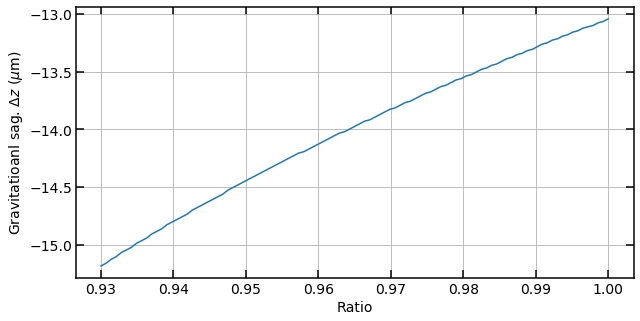

In [12]:
ratio = Symbol(r"R", positive=True)
tmp = series(diff(U0, z).subs({x: 0, y:0, dz: 0}), z, 0, 2)
tmp = tmp.removeO()

z0_sag = solve(tmp, z)
z0_sag_val = z0_sag[0].subs({I01: 2 * P01 / (pi * w01**2), I02: 2 * P02 / (pi * w02**2)})
z0_sag_val = z0_sag_val.subs({alpha0: alpha0_calc.evalf(),
                              P01: P01_val * ratio, w01: w01_val,
                              P02: P02_val * ratio, w02: w02_val,
                              g: g_val, mass: mass_Rb_val})

z0_sag_val = z0_sag_val.evalf()

ratios = np.linspace(1, 0.93, 101)
z0_sag_vals = lambdify(ratio, z0_sag_val, "numpy")
z0_sag_vals = z0_sag_vals(ratios)

z_vals = np.linspace(-20, 3, 2001) * 1e-6

for n, z0_loop in enumerate(z0_sag_vals):
    U0_eval = U0.subs({alpha0: alphaH_calc, I01: 2 * P01 / (pi * w01**2), I02: 2 * P02 / (pi * w02**2)})
    U0_eval = U0_eval.subs({P01: P01_val * ratio, w01: w01_val,
                            P02: P02_val * ratio, w02: w02_val,
                            lambdaFORT: lambdaFORT, g: g_val, mass: mass_Rb_val, ratio: ratios[n],
                      x: 0, y: 0, dz: dz_val})
    U0_eval = lambdify(z, U0_eval, "numpy")
    U0_val = U0_eval(z_vals) - U0_eval(z0_loop)
    z0_sag_vals[n] = z_vals[U0_val == np.min(U0_val)]
    
plt.figure(figsize=(10, 5))
plt.plot(ratios, z0_sag_vals * 1e6)
plt.xlabel('Ratio')
plt.ylabel('Gravitatioanl sag. $\Delta z$ ($\mu$m)')
plt.grid()

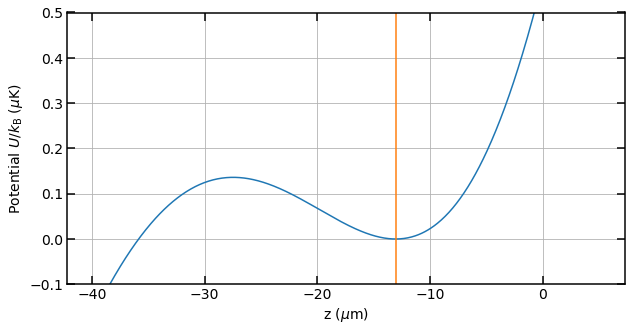

In [13]:
N_val = 0
z_vals = np.linspace(-40, 5, 801) * 1e-6

U0_eval = U0.subs({alpha0: alphaH_calc, I01: 2 * P01 / (pi * w01**2), I02: 2 * P02 / (pi * w02**2)})
U0_eval = U0_eval.subs({P01: P01_val * ratio, w01: w01_val,
                        P02: P02_val * ratio, w02: w02_val,
                        lambdaFORT: lambdaFORT, g: g_val, mass: mass_Rb_val, ratio: ratios[N_val],
                        x: 0, y: 0, dz: dz_val})
U0_eval = lambdify(z, U0_eval, "numpy")
U0_vals = U0_eval(z_vals) - U0_eval(z0_sag_vals[N_val])

z0_sag_vals_tmps = np.array([z0_sag_vals[N_val], z0_sag_vals[N_val]])

plt.figure(figsize=(10, 5))
plt.plot(z_vals * 1e6, U0_vals / kB_val * 1e6)
plt.plot(z0_sag_vals_tmps*1e6, [-10, 30])
plt.xlabel('z ($\mu$m)')
plt.ylabel('Potential $U/k_{\mathrm{B}}$ ($\mu$K)')
plt.grid()
plt.ylim([-0.1, 0.5])

np.max(U0_vals[z_vals < z0_sag_vals[N_val]]) / kB_val * 1e6

#### Trap frequency of FORT

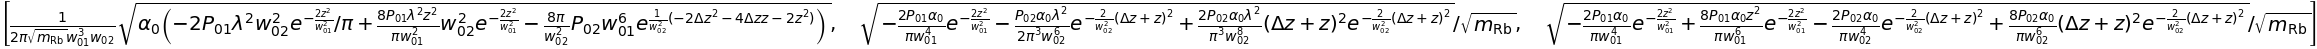

In [14]:
omega_x_FORT = sqrt(1/mass * (simplify(diff(U0, x, 2).subs({x: 0, y:0})))).subs({I01: 2 * P01 / (pi * w01**2),
                                                                                      I02: 2 * P02 / (pi * w02**2)})
omega_y_FORT = sqrt(1/mass * (simplify(diff(U0, y, 2).subs({x: 0, y:0})))).subs({I01: 2 * P01 / (pi * w01**2),
                                                                                      I02: 2 * P02 / (pi * w02**2)})
omega_z_FORT = sqrt(1/mass * (simplify(diff(U0, z, 2).subs({x: 0, y:0})))).subs({I01: 2 * P01 / (pi * w01**2),
                                                                                      I02: 2 * P02 / (pi * w02**2)})

[omega_x_FORT, omega_y_FORT, omega_z_FORT]

In [15]:
omega_x_FORT_calc = omega_x_FORT.subs({alpha0: alpha0_calc,
                                       P01: P01_val * ratios[0], w01: w01_val,
                                       P02: P02_val * ratios[0], w02: w02_val,
                                       lambdaFORT: lambdaFORT_val, k: 2 * pi / lambdaFORT_val,
                                       mass: mass_Rb_val, ratio: ratios[0], z: z0_sag_vals[0], dz: dz_val})
omega_x_FORT_calc = omega_x_FORT_calc.evalf()

omega_y_FORT_calc = omega_y_FORT.subs({alpha0: alpha0_calc,
                                       P01: P01_val * ratios[0], w01: w01_val,
                                       P02: P02_val * ratios[0], w02: w02_val,
                                       lambdaFORT: lambdaFORT_val, k: 2 * pi / lambdaFORT_val,
                                       mass: mass_Rb_val, ratio: ratios[0], z: z0_sag_vals[0], dz: dz_val})
omega_y_FORT_calc = omega_y_FORT_calc.evalf()

omega_z_FORT_calc = omega_z_FORT.subs({alpha0: alpha0_calc,
                                       P01: P01_val * ratios[0], w01: w01_val,
                                       P02: P02_val * ratios[0], w02: w02_val,
                                       lambdaFORT: lambdaFORT_val, k: 2 * pi / lambdaFORT_val,
                                       mass: mass_Rb_val, ratio: ratios[0], z: z0_sag_vals[0], dz: dz_val})
omega_z_FORT_calc = omega_z_FORT_calc.evalf()

[omega_x_FORT_calc/(2*np.pi), omega_y_FORT_calc/(2*np.pi), omega_z_FORT_calc/(2*np.pi)]

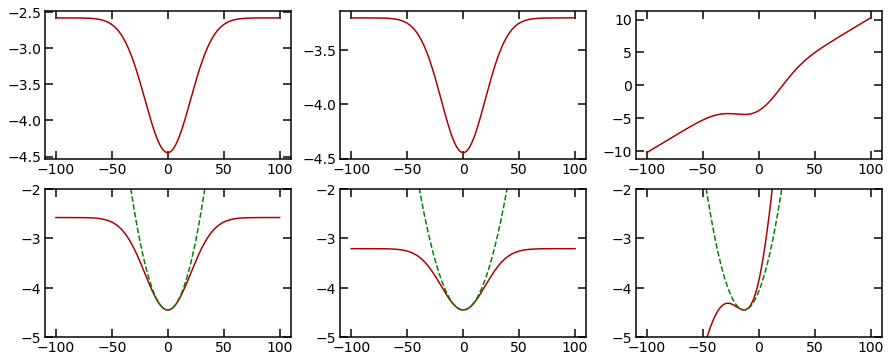

In [16]:
x_vals = np.linspace(-100e-6, 100e-6, 2001)
y_vals = np.linspace(-100e-6, 100e-6, 2001)
z_vals = np.linspace(-100e-6, 100e-6, 2001)

U0_x_est = lambdify(x, (U0.subs({alpha0: alpha0_calc, lambdaFORT: lambdaFORT_val,
                                 I01: 2 * P01_val / (np.pi * w01_val**2), w01: w01_val, P01: P01_val,
                                 I02: 2 * P02_val / (np.pi * w02_val**2), w02: w02_val, P02: P02_val,
                                 mass: mass_Rb_val, g: g_val,
                                 y: 0, z: z0_sag_vals[0], dz: dz_val})).evalf(),
                    "numpy")
U0_y_est = lambdify(y, (U0.subs({alpha0: alpha0_calc, lambdaFORT: lambdaFORT_val,
                                 I01: 2 * P01_val / (np.pi * w01_val**2), w01: w01_val, P01: P01_val,
                                 I02: 2 * P02_val / (np.pi * w02_val**2), w02: w02_val, P02: P02_val,
                                 mass: mass_Rb_val, g: g_val,
                                 x: 0, z: z0_sag_vals[0], dz: dz_val})).evalf(),
                    "numpy")
U0_z_est = lambdify(z, (U0.subs({alpha0: alpha0_calc, lambdaFORT: lambdaFORT_val,
                                 I01: 2 * P01_val / (np.pi * w01_val**2), w01: w01_val, P01: P01_val,
                                 I02: 2 * P02_val / (np.pi * w02_val**2), w02: w02_val, P02: P02_val,
                                 mass: mass_Rb_val, g: g_val,
                                 x: 0, y: 0, dz: dz_val})).evalf(),
                    "numpy")
U0_x_vals = U0_x_est(x_vals) / kB_val * 1e6
U0_y_vals = U0_y_est(y_vals) / kB_val * 1e6
U0_z_vals = U0_z_est(z_vals) / kB_val * 1e6

U0_x_vals_approx =  mass_Rb_val * (omega_x_FORT_calc)**2 * x_vals**2 / (2 * kB_val) * 1e6 + np.min(U0_x_vals)
U0_y_vals_approx =  mass_Rb_val * (omega_y_FORT_calc)**2 * y_vals**2 / (2 * kB_val) * 1e6 + np.min(U0_y_vals)
U0_z_vals_approx =  mass_Rb_val * (omega_z_FORT_calc)**2 * (z_vals - z0_sag_vals[0])**2 / 2 + U0_z_est(z0_sag_vals[0])
U0_z_vals_approx *= 1e6 / kB_val

plt.figure(figsize=([15, 6]))

plt.subplot(2, 3, 1)
plt.plot(x_vals * 1e6, U0_x_vals, '#aa0000')
plt.subplot(2, 3, 2)
plt.plot(y_vals * 1e6, U0_y_vals, '#aa0000')
plt.subplot(2, 3, 3)
plt.plot(z_vals * 1e6, U0_z_vals, '#aa0000')

plt.subplot(2, 3, 4)
plt.plot(x_vals * 1e6, U0_x_vals, '#aa0000')
plt.plot(x_vals * 1e6, U0_x_vals_approx, 'g--')
plt.ylim([-5, -2])
plt.subplot(2, 3, 5)
plt.plot(y_vals * 1e6, U0_y_vals, '#aa0000')
plt.plot(y_vals * 1e6, U0_y_vals_approx, 'g--')
plt.ylim([-5, -2])
plt.subplot(2, 3, 6)
plt.plot(z_vals * 1e6, U0_z_vals, '#aa0000')
plt.plot(z_vals * 1e6, U0_z_vals_approx, 'g--')
plt.ylim([-5, -2])

### Triangular lattice

#### Parameters
Wavenumbers of horizontal lattice $\boldsymbol{k}_{H}^i$ are defined by
\begin{eqnarray*}
\boldsymbol{k}_H = 
\begin{pmatrix}
\boldsymbol{k}_{H}^1 & \boldsymbol{k}_{H}^2 & \boldsymbol{k}_{H}^3 \\
\end{pmatrix}
= k_H \times \begin{pmatrix}
1 & \cos\theta_H & \cos\theta_H \\
0 & \sin\theta_H & -\sin\theta_H \\
0 & 0 & 0 \\
\end{pmatrix},
\end{eqnarray*}
where wavenumber $k_{H} = 2\pi / \lambda_H$ and $\theta_H$ is relative angle between lattice beams.

Wavenumbers of vertical lattice $k_{V}^i$ are also defined by
\begin{eqnarray*}
\boldsymbol{k}_V = 
\begin{pmatrix}
\boldsymbol{k}_{V}^1 & \boldsymbol{k}_{V}^2 \\
\end{pmatrix}
= k_V \times \begin{pmatrix}
\cos(\theta_V/2) & \cos(\theta_V/2) \\
0 & 0 \\
\sin(\theta_V/2) & -\sin(\theta_V/2) \\
\end{pmatrix},
\end{eqnarray*}
where $k_{V} = 2\pi / \lambda_V$ and $\theta_V$ is relative angle between lattice beams.

In [17]:
thetaH, thetaV = symbols(r'\theta_H \theta_V', real=True)
kH, kV = symbols("k_H k_V", real=True) # Wavenumber of horizontal and vertical lattice beam
lambdaH, lambdaV = symbols(r'\lambda_{H} \lambda_{V}', real=True) # Wavelength of horizontal and vertical lattice beam

w0H = Symbol("w_{0H}", positive=True) # beam radius of horizontal lattice beam
elipH = Symbol(r"\eta_{H}", positive=True) # beam ellipticity of horizontal lattice beam

w0V = Symbol("w_{0V}", positive=True) # beam radius of vertical lattice beam
elipV = Symbol(r"\eta_{V}", positive=True) # beam ellipticity of vertical lattice beam

P0H, P0V = symbols(r'P_{0H} P_{0V}', positive=True) # Laser power of horizontal and vertical lattice

alphaH, alphaV = symbols(r'\alpha_{H} \alpha_{V}', real=True)

# Horizontal lattice wavevector: kHs
kHs = transpose(kH * Matrix([[1, 0, 0], [cos(thetaH), sin(thetaH), 0], [cos(thetaH), -sin(thetaH), 0]]))

# Vertical lattice wavevector: kVs
kVs = transpose(kV * Matrix([[cos(thetaV/2), 0, sin(thetaV/2)], [cos(thetaV/2), 0, -sin(thetaV/2)]]))

### Intensity of lattice beams
#### Horizontal lattice
Electric field $\boldsymbol{E}_H$ can be written by
\begin{eqnarray}
\boldsymbol{E}_H = \sum_i^3 \boldsymbol{E}_{H}^i e^{-j\boldsymbol{k}_H^i \cdot \boldsymbol{r}},
\end{eqnarray}
where
\begin{eqnarray}
\boldsymbol{E}_H^i = E_{0H} \exp
\left[
-\dfrac{\boldsymbol{k}_H^i \cdot \boldsymbol{r}}{w_{0H}^2}
\right] \hat{e}_z,
\end{eqnarray}



#### Vertical lattice
Electric field $\boldsymbol{E}_V$ can be written by
\begin{eqnarray}
\boldsymbol{E}_V = \sum_i^2 E_{V}^i
\end{eqnarray}

[1] [原書6版 ヤリーヴ-イェー 光エレクトロニクス 基礎編](https://www.amazon.co.jp/%E5%8E%9F%E6%9B%B86%E7%89%88-%E3%83%A4%E3%83%AA%E3%83%BC%E3%83%B4-%E3%82%A4%E3%82%A7%E3%83%BC-%E5%85%89%E3%82%A8%E3%83%AC%E3%82%AF%E3%83%88%E3%83%AD%E3%83%8B%E3%82%AF%E3%82%B9-%E5%9F%BA%E7%A4%8E%E7%B7%A8-Amnon-Yariv/dp/4621082655)

In [18]:
EH = 0
for n in range(3):
    kHn = kHs[0:3:1, n]
    z_tmp = ((transpose(kHn) * r) / kH)[0]
    r_tmp = Norm_vector(simplify((Cross_vector(kHn, r) / kH)).subs(z, 0))
    
    ##
    zR = pi * w0H**2 / lambdaH
    wH = w0H * sqrt(1 + (z_tmp/zR)**2)
    Etmp = exp(-I* kH * z_tmp - r_tmp**2/wH**2) * sqrt(w0H / wH)
    
    zR = pi * (elipH * w0H)**2 / lambdaH
    wH = elipH * w0H * sqrt(1 + (z_tmp/zR)**2)
    Etmp *= exp(- z**2/(wH)**2) * sqrt(elipH * w0H / wH)
    
    Etmp *= sqrt(2*P0H / (pi * elipH * w0H**2))
    
    EH += Etmp
    
IH = EH * EH.conjugate()

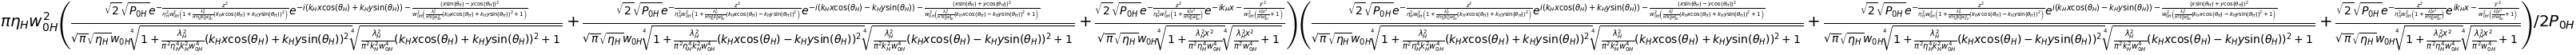

In [19]:
(IH/(2*P0H / (pi * elipH * w0H**2)))

In [20]:
EV = 0
for n in range(2):
    kVn = kVs[0:3:1, n]
    z_tmp = simplify((transpose(kVn) * r) / kV)[0]
    r_tmp = Norm_vector(simplify((Cross_vector(kVn, r) / kV))).subs(y, 0)
    
    zR = pi * (elipV * w0V)**2 / lambdaV
    wV = elipV * w0V * sqrt(1 + (z_tmp/zR)**2)
    Etmp = exp(-I* kV * z_tmp - r_tmp**2/wV**2) * sqrt(elipV * w0V / wV)
    
    zR = pi * w0V**2 / lambdaV
    wV = w0V * sqrt(1 + (z_tmp/zR)**2)
    Etmp *= exp(- y**2/(wV)**2) * sqrt(w0V / wV)
    Etmp *= sqrt(2*P0V / (pi * elipV * w0V**2))
    
    EV += Etmp

IV = EV * EV.conjugate()

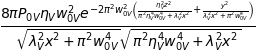

In [21]:
simplify(IV.subs({thetaV: 0}))

### Potential $U$

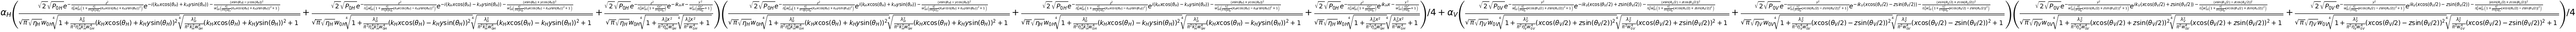

In [22]:
UH = alphaH * IH / 4
UV = alphaV * IV / 4

U = UH + UV
U

C:\Anaconda3\lib\site-packages\numpy\core\numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


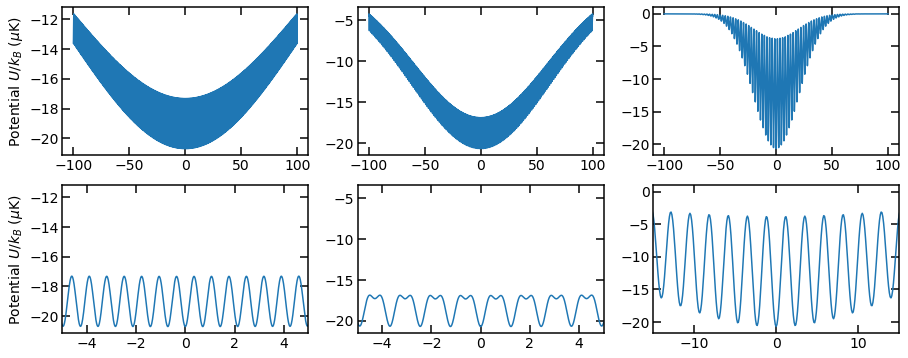

In [23]:
x_vals = np.linspace(-100e-6, 100e-6, 20001)
y_vals = np.linspace(-100e-6, 100e-6, 20001)
z_vals = np.linspace(-100e-6, 100e-6, 2001)

U_x_est = lambdify(x, (U.subs({alphaH: alphaH_calc, lambdaH: lambdaH_val, kH: 2 * np.pi / lambdaH_val, thetaH: thetaH_val,
                               alphaV: alphaV_calc, lambdaV: lambdaV_val, kV: 2 * np.pi / lambdaV_val, thetaV: thetaV_val,
                               P0H: P0H_val, w0H: w0H_val, elipH: elipH_val,
                               P0V: P0V_val, w0V: w0V_val, elipV: elipV_val,
                               mass: mass_Rb_val, g: g_val,
                               y: 0, z: 0})).evalf(),
                   "numpy")
U_y_est = lambdify(y, (U.subs({alphaH: alphaH_calc, lambdaH: lambdaH_val, kH: 2 * np.pi / lambdaH_val, thetaH: thetaH_val,
                               alphaV: alphaV_calc, lambdaV: lambdaV_val, kV: 2 * np.pi / lambdaV_val, thetaV: thetaV_val,
                               P0H: P0H_val, w0H: w0H_val, elipH: elipH_val,
                               P0V: P0V_val, w0V: w0V_val, elipV: elipV_val,
                               mass: mass_Rb_val, g: g_val,
                               x: 0, z: 0})).evalf(),
                    "numpy")
U_z_est = lambdify(z, (U.subs({alphaH: alphaH_calc, lambdaH: lambdaH_val, kH: 2 * np.pi / lambdaH_val, thetaH: thetaH_val,
                               alphaV: alphaV_calc, lambdaV: lambdaV_val, kV: 2 * np.pi / lambdaV_val, thetaV: thetaV_val,
                               P0H: P0H_val, w0H: w0H_val, elipH: elipH_val,
                               P0V: P0V_val, w0V: w0V_val, elipV: elipV_val,
                               mass: mass_Rb_val, g: g_val,
                               x: 0, y: 0})).evalf(),
                    "numpy")

U_x_vals = U_x_est(x_vals) / kB_val * 1e6
U_y_vals = U_y_est(y_vals) / kB_val * 1e6
U_z_vals = U_z_est(z_vals) / kB_val * 1e6

plt.figure(figsize=([15, 6]))

plt.subplot(2, 3, 1)
plt.plot(x_vals * 1e6, U_x_vals)
plt.ylabel(r'Potential $U/k_B$ ($\mu$K)')
plt.subplot(2, 3, 2)
plt.plot(y_vals * 1e6, U_y_vals)
plt.subplot(2, 3, 3)
plt.plot(z_vals * 1e6, U_z_vals)

plt.subplot(2, 3, 4)
plt.plot(x_vals * 1e6, U_x_vals)
plt.xlim([-5, 5])
plt.ylabel(r'Potential $U/k_B$ ($\mu$K)')
#plt.ylim([-5, 0.5])
plt.subplot(2, 3, 5)
plt.plot(y_vals * 1e6, U_y_vals)
plt.xlim([-5, 5])
#plt.ylim([-5, 0.5])
plt.subplot(2, 3, 6)
plt.plot(z_vals * 1e6, U_z_vals)
plt.xlim([-15, 15])
#plt.ylim([-5, 0.5])

### Trap frequency $\omega$

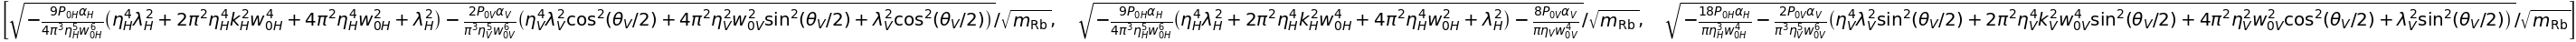

In [24]:
omega_x = sqrt(1/mass * (simplify(diff(UH, x, 2).subs({x: 0, y:0, z:0, thetaH: 2*pi/3}))
                        + simplify(diff(UV, x, 2).subs({x: 0, y:0, z:0, thetaH: 2*pi/3}))))
omega_y = sqrt(1/mass * (simplify(diff(UH, y, 2).subs({x: 0, y:0, z:0, thetaH: 2*pi/3}))
                        + simplify(diff(UV, y, 2).subs({x: 0, y:0, z:0, thetaH: 2*pi/3}))))
omega_z = sqrt(1/mass * (simplify(diff(UH, z, 2).subs({x: 0, y:0, z:0, thetaH: 2*pi/3}))
                        + simplify(diff(UV, z, 2).subs({x: 0, y:0, z:0, thetaH: 2*pi/3}))))

[omega_x, omega_y, omega_z]

In [25]:
P0H_val = 1.5
P0V_val = 0.5


omega_x_calc = omega_x.subs({alphaH: alphaH_calc, alphaV: alphaV_calc,
                             P0H: P0H_val, elipH: elipH_val, w0H: w0H_val,
                             P0V: P0V_val, elipV: elipV_val, w0V: w0V_val, thetaV: thetaV_val,
                             lambdaH: lambdaH_val, kH: 2 * pi / lambdaH_val,
                             lambdaV: lambdaV_val, kV: 2 * pi / lambdaV_val,
                             mass: mass_Rb_val})

omega_y_calc = omega_y.subs({alphaH: alphaH_calc, alphaV: alphaV_calc,
                             P0H: P0H_val, elipH: elipH_val, w0H: w0H_val,
                             P0V: P0V_val, elipV: elipV_val, w0V: w0V_val, thetaV: thetaV_val,
                             lambdaH: lambdaH_val, kH: 2 * pi / lambdaH_val,
                             lambdaV: lambdaV_val, kV: 2 * pi / lambdaV_val,
                             mass: mass_Rb_val})

omega_z_calc = omega_z.subs({alphaH: alphaH_calc, alphaV: alphaV_calc,
                             P0H: P0H_val, elipH: elipH_val, w0H: w0H_val,
                             P0V: P0V_val, elipV: elipV_val, w0V: w0V_val, thetaV: thetaV_val,
                             lambdaH: lambdaH_val, kH: 2 * pi / lambdaH_val,
                             lambdaV: lambdaV_val, kV: 2 * pi / lambdaV_val,
                             mass: mass_Rb_val})

[(omega_x_calc/(2*pi)).evalf()*1e-3, (omega_y_calc/(2*pi)).evalf()*1e-3, (omega_z_calc/(2*pi)).evalf()*1e-3]

In [26]:
UH_calc = UH.subs({alphaH: alphaH_calc, P0H: P0H_val, elipH: elipH_val, w0H: w0H_val, thetaH: thetaH_val,
                  lambdaH: lambdaH_val, kH: 2 * pi / lambdaH_val,
                  x: 0, y: 0, z: 0})

#UH_calc = -alpha_calc * (2*P0H / (pi * w0H**2 * elipH)) / 4
#UH_calc = UH_calc.subs({P0H: 1500e-3, elipH: 1/3, w0H: 120e-6})

UH_calc_T = UH_calc.evalf() / kB_val * 1e6
[UH_calc_T, UH_calc_T * 8/9]

In [27]:
UV_calc = UV.subs({alphaV: alphaV_calc, P0V: P0V_val, elipV: elipV_val, w0V: w0V_val, thetaV: thetaV_val,
                  lambdaV: lambdaV_val, kV: kV_val,
                  x: 0, y: 0, z: 0})

#UH_calc = -alpha_calc * (2*P0H / (pi * w0H**2 * elipH)) / 4
#UH_calc = UH_calc.subs({P0H: 1500e-3, elipH: 1/3, w0H: 120e-6})

UV_calc_T = UV_calc.evalf() / kB_val * 1e6
UV_calc_T

-----

In [28]:
a1 = lambdaH * 2/3
a1

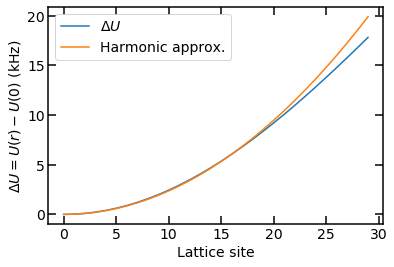

In [29]:
N = 30
sEr = 30
omega_est = 135 * np.sqrt(30 / 50)

a1_calc = a1.subs(lambdaH, lambdaH_val)

dl = [a1_calc * n for n in range(N)]

dUH = [abs(UH.subs({x: n * a1_calc, y: 0, z: 0, alphaH: alphaH_calc, P0H: 1.800/2590 * sEr, elipH: 3, w0H: 40e-6, thetaH: 2 * pi / 3,
                         lambdaH: lambdaH_val, kH: 2 * pi / lambdaH_val, mass: mass_Rb_val}).evalf()
                - UH.subs({x: 0, y: 0, z: 0, alphaH: alphaH_calc, P0H: 1.800/2590 * sEr, elipH: 3, w0H: 40e-6, thetaH: 2 * pi / 3,
                           lambdaH: lambdaH_val, kH: 2 * pi / lambdaH_val, mass: mass_Rb_val}).evalf()) for n in range(N)]

U_appox = mass_Rb_val * (2 * np.pi * omega_est)**2 * np.array(dl)**2 / 2

plt.plot(np.array(dl)/a1_calc, np.array(dUH)/h_val * 1e-3, label=r'$\Delta U$')
plt.plot(np.array(dl)/a1_calc, np.array(U_appox)/h_val * 1e-3, label=r'Harmonic approx.')
plt.xlabel('Lattice site')
plt.ylabel('$\Delta U = U(r) - U(0)$ (kHz)')
plt.legend()
omega_est

----

In [30]:
omega_x_calc = omega_x.subs({alphaH: alphaH_calc, alphaV: alphaV_calc,
                             P0H: 0, elipH: elipH_val, w0H: w0H_val,
                             P0V: P0V_val, elipV: elipV_val, w0V: w0V_val, thetaV: thetaV_val,
                             lambdaV: lambdaV_val, kV: kV_val,
                             mass: mass_Rb_val})

omega_y_calc = omega_y.subs({alphaH: alphaH_calc, alphaV: alphaV_calc,
                             P0H: 0, elipH: elipH_val, w0H: w0H_val,
                             P0V: P0V_val, elipV: elipV_val, w0V: w0V_val, thetaV: thetaV_val,
                             lambdaV: lambdaV_val, kV: kV_val,
                             mass: mass_Rb_val})

omega_z_calc = omega_z.subs({alphaH: alphaH_calc, alphaV: alphaV_calc,
                             P0H: 0, elipH: elipH_val, w0H: w0H_val,
                             P0V: P0V_val, elipV: elipV_val, w0V: w0V_val, thetaV: thetaV_val,
                             lambdaV: lambdaV_val, kV: kV_val,
                             mass: mass_Rb_val})
[(omega_x_calc/(2*pi)).evalf(), (omega_y_calc/(2*pi)).evalf(), (omega_z_calc/(2*pi)).evalf()]

    Reference)
    高橋研: Lieb, parameter
        Unit - Er by 1064 nm
        w_sx = 106 um
        sx = 13 Er
        omega_sx = 103.3 Hz (2 pi 込み)